# Projet : Mimouni Saad et Marouane Zaid
## Partie I : Boston Housing- Régression
### Statistiques Descriptives
#### 1. Calculer moyenne, médiane, écart-type, quantiles pour chaque variable :

Au premier on charge les données :


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df = pd.read_csv('housing.csv', sep=r'\s+', names=columns).astype(float)

.describe() Calcule tout cela en une seule commande.

In [2]:
descriptive_stats = df.describe()
print(descriptive_stats)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

#### 2. Calculer les intervalles de confiance à 95% des moyennes :


In [3]:
print("\n" + "-"*50 + "\n")
n = len(df)
df_ic = pd.DataFrame(index=df.columns, columns=['IC_95_Inf', 'IC_95_Sup'])

for col in df.columns:
    mean = df[col].mean()
    sem = df[col].sem()

    ic_95 = stats.t.interval(0.95, df=n-1, loc=mean, scale=sem)

    df_ic.loc[col, 'IC_95_Inf'] = ic_95[0]
    df_ic.loc[col, 'IC_95_Sup'] = ic_95[1]

print(df_ic)


--------------------------------------------------

          IC_95_Inf   IC_95_Sup
CRIM       2.862262    4.364786
ZN         9.326645   13.400628
INDUS     10.537593   11.735964
CHAS       0.046986    0.091354
NOX        0.544574    0.564816
RM         6.223268    6.346001
AGE        66.11637   71.033433
DIS        3.611129    3.978956
RAD        8.788912   10.309902
TAX      393.517063  422.957245
PTRATIO   18.266446   18.644621
B        348.700306  364.647757
LSTAT      12.02936   13.276766
MEDV      21.729528   23.336085


####  3. Testez la normalité avec le test de Shapiro-Wilk :

In [4]:
shapiro_results = []
for col in df.columns:
    # Le test de Shapiro ne fonctionne pas si toutes les valeurs sont identiques
    if df[col].nunique() > 1:
        stat, p_value = stats.shapiro(df[col])
        interpretation = "Non Normal" if p_value < 0.05 else "Normal"
        shapiro_results.append({
            'Variable': col,
            'W-Statistic': f"{stat:.4f}",
            'p-value': f"{p_value:.6f}",
            'Interpretation': interpretation
        })
    else:
        shapiro_results.append({
            'Variable': col,
            'W-Statistic': 'N/A',
            'p-value': 'N/A',
            'Interpretation': 'Donnée constante'
        })

df_shapiro = pd.DataFrame(shapiro_results).set_index('Variable')
print(df_shapiro)

         W-Statistic   p-value Interpretation
Variable                                     
CRIM          0.4500  0.000000     Non Normal
ZN            0.5559  0.000000     Non Normal
INDUS         0.8998  0.000000     Non Normal
CHAS          0.2748  0.000000     Non Normal
NOX           0.9356  0.000000     Non Normal
RM            0.9609  0.000000     Non Normal
AGE           0.8920  0.000000     Non Normal
DIS           0.9032  0.000000     Non Normal
RAD           0.6796  0.000000     Non Normal
TAX           0.8152  0.000000     Non Normal
PTRATIO       0.9036  0.000000     Non Normal
B             0.4768  0.000000     Non Normal
LSTAT         0.9369  0.000000     Non Normal
MEDV          0.9172  0.000000     Non Normal


#### 4. Visualisez : histogrammes, boxplots, courbes de densité (KDE)

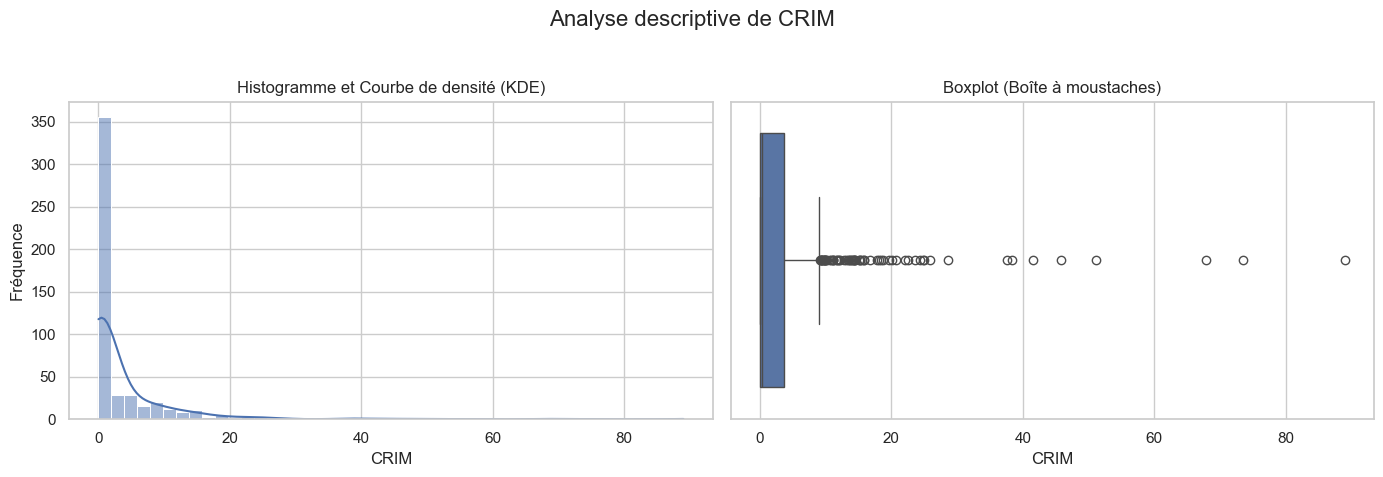

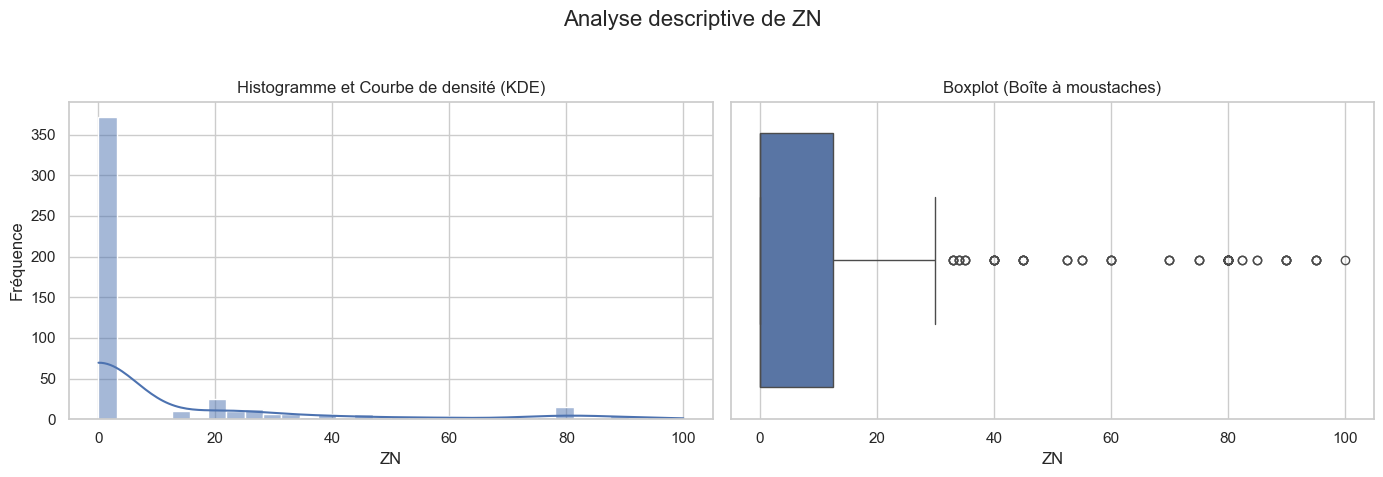

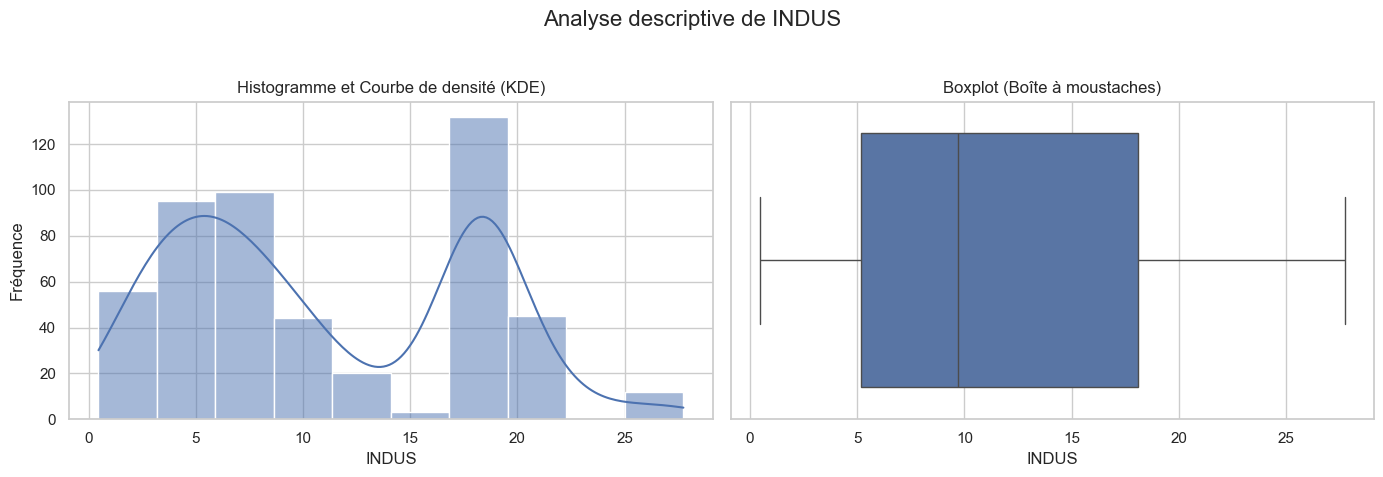

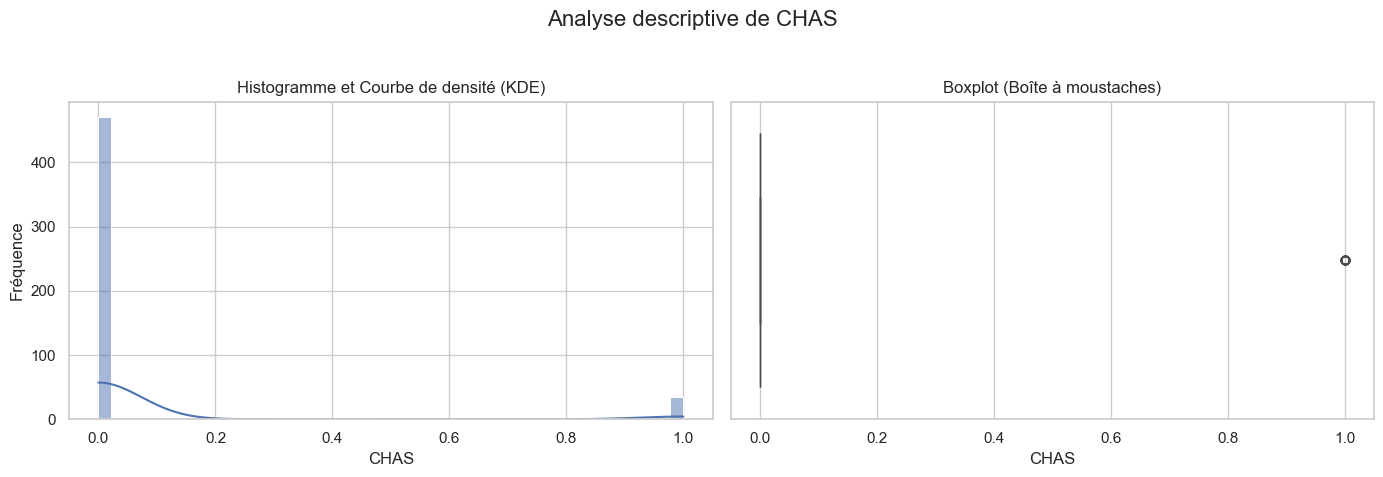

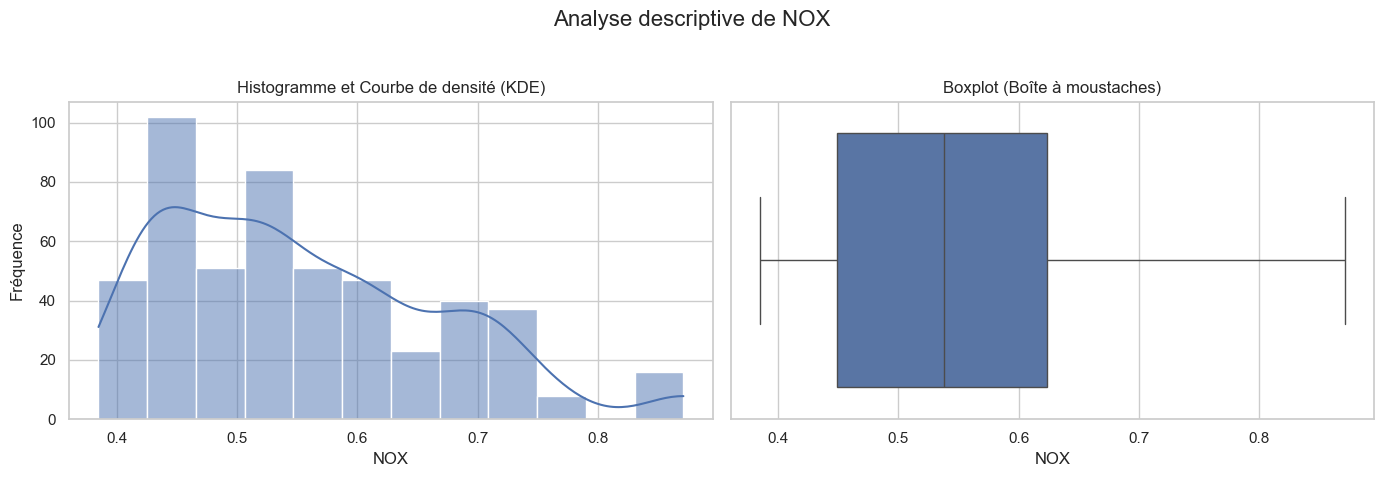

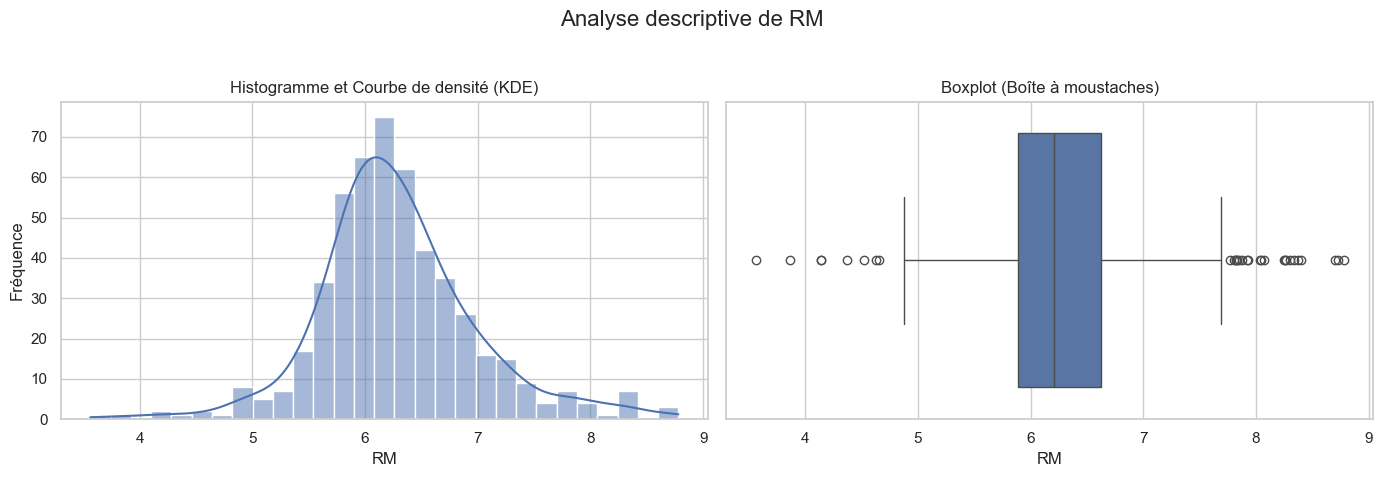

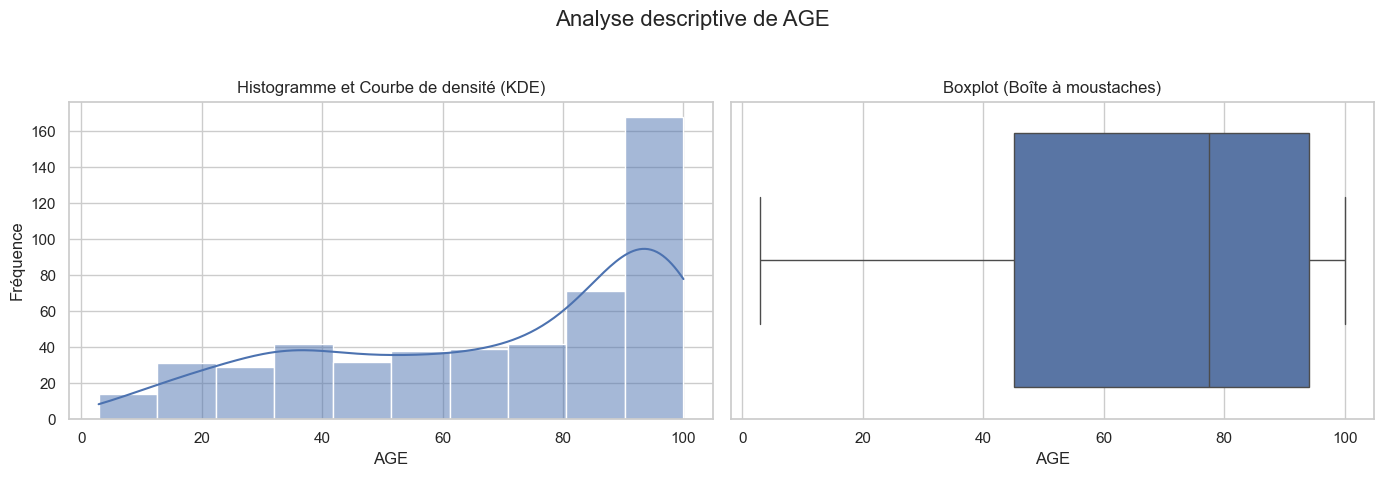

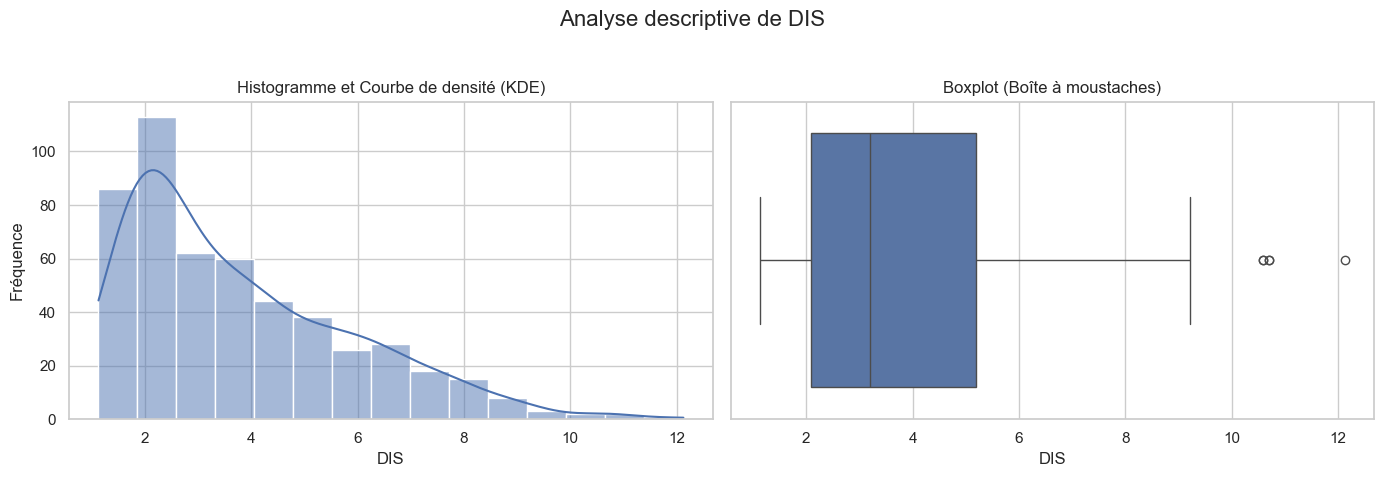

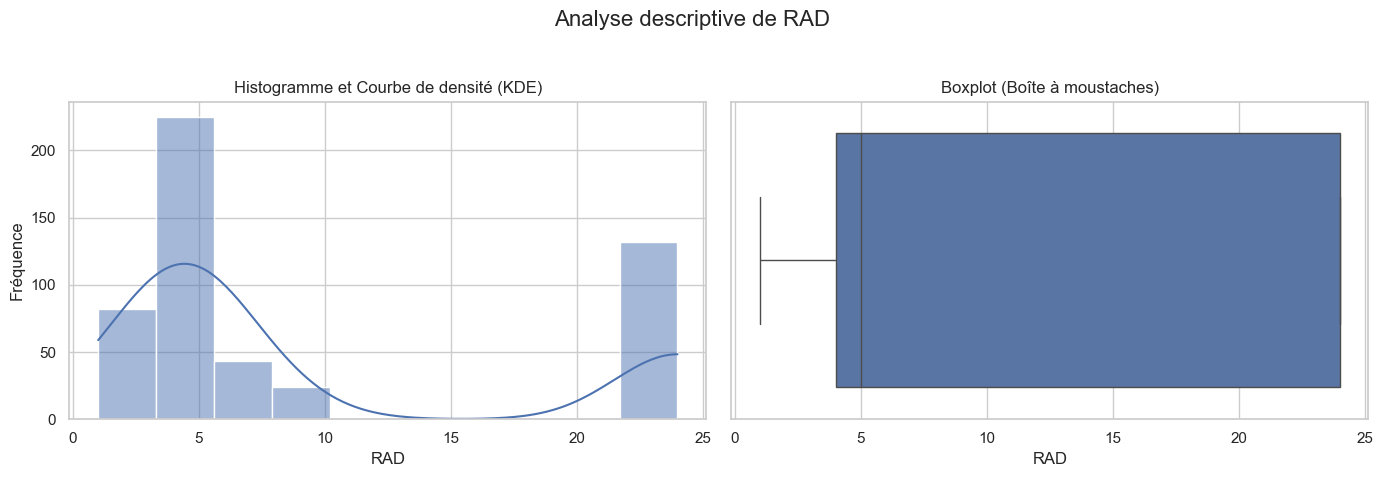

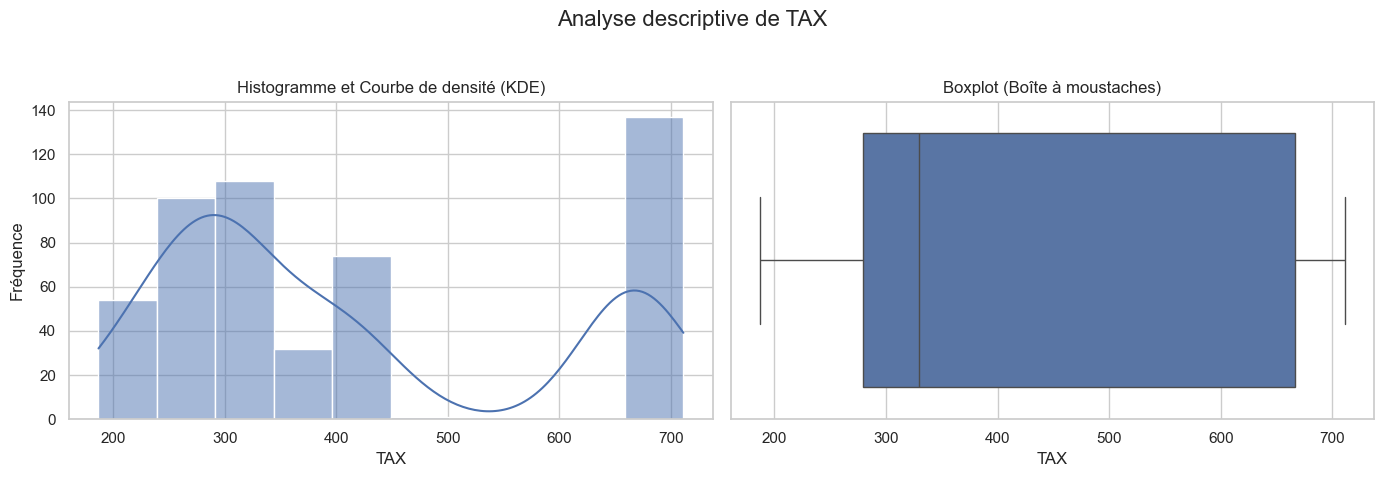

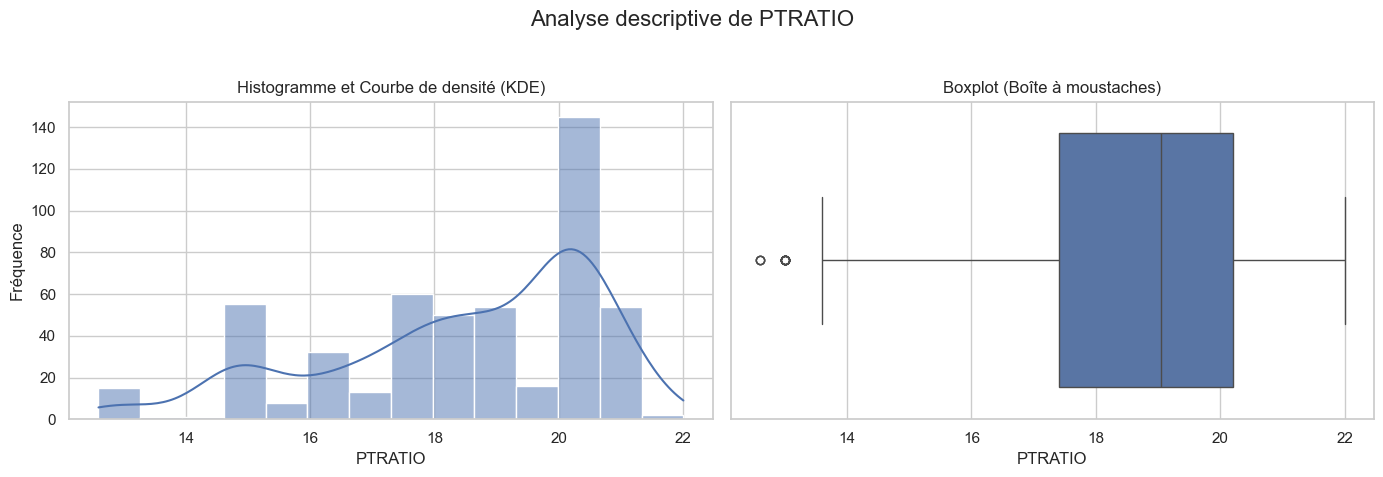

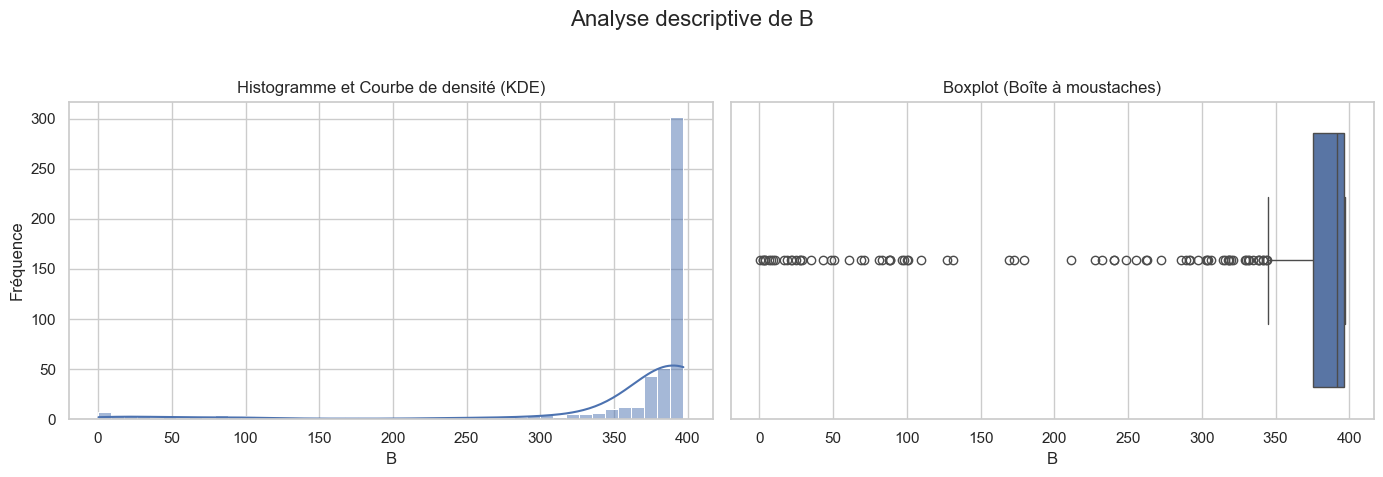

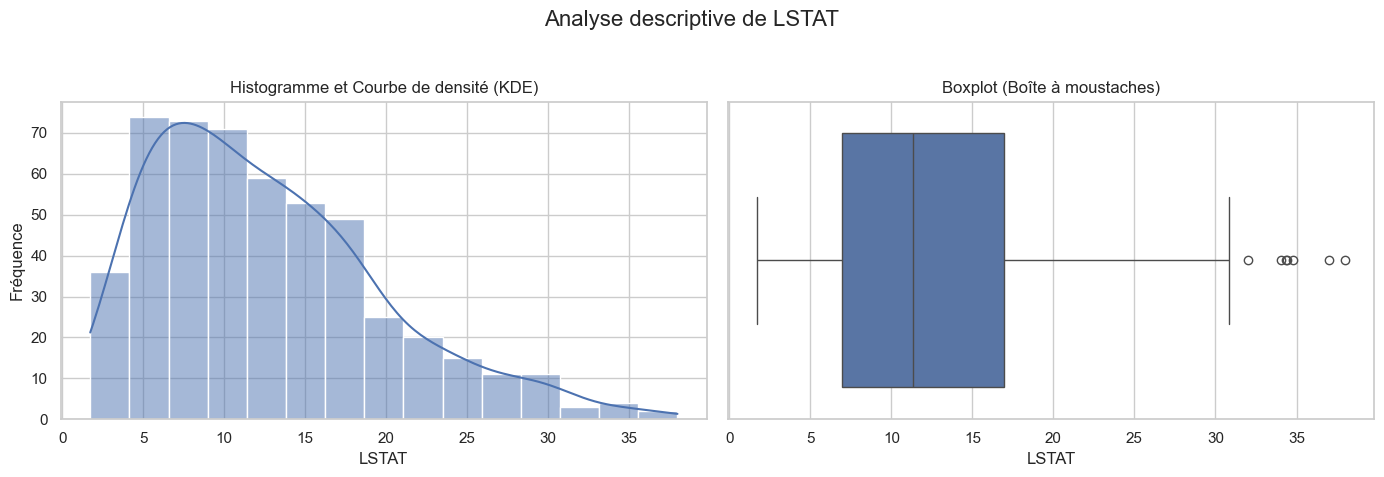

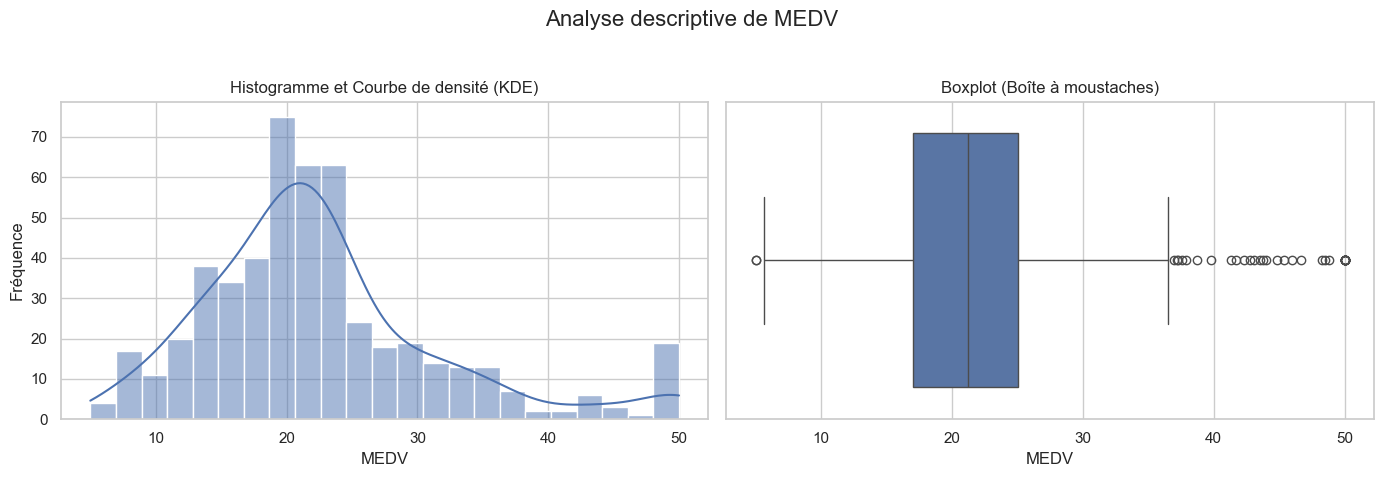

In [5]:
sns.set_theme(style="whitegrid")
for col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Analyse descriptive de {col}", fontsize=16)

    # Graphique 1: Histogramme et Courbe de densité (KDE)
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title("Histogramme et Courbe de densité (KDE)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Fréquence")

    # Graphique 2: Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title("Boxplot (Boîte à moustaches)")
    axes[1].set_xlabel(col)

    # Afficher les graphiques
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Analyse bivariée


#### 1.Créer une matrice de coorélation(heatmap)

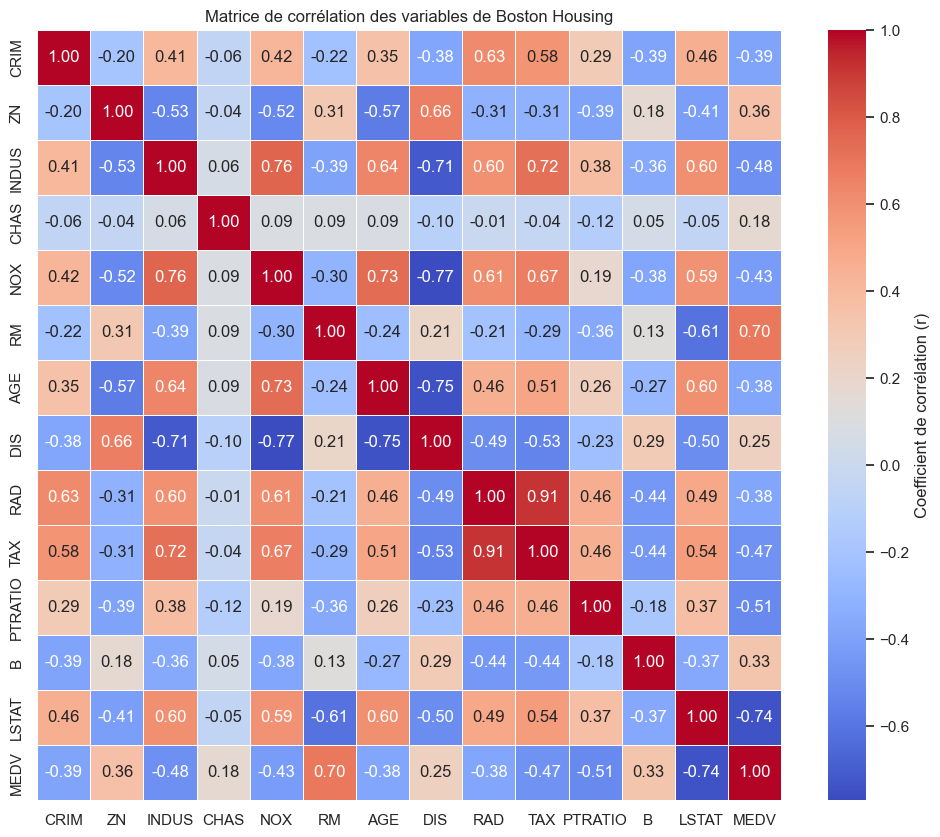

In [6]:
correlation_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True, # Afficher les coefficients sur la carte
    fmt=".2f", # Format à deux décimales
    cmap='coolwarm', # Palette de couleurs
    linewidths=.5, # Lignes séparatrices
    cbar_kws={'label': 'Coefficient de corrélation (r)'}
)
plt.title('Matrice de corrélation des variables de Boston Housing')
plt.show()

#### 2. Pour chaque paire : calculez le coefficient r, R2, et l’IC95 du R2



In [7]:
bivariate_results = []
target_variable = 'MEDV'
alpha = 0.03 # Seuil de significativité pour la question 3

for feature in df.columns:
    if feature != target_variable:
        # Calcul du coefficient r et de la p-value
        r, p_value = stats.pearsonr(df[feature], df[target_variable])

        # Calcul du R²
        r_squared = r**2

        # Détermination de la significativité
        is_significant = "Oui" if p_value < alpha else "Non"

        bivariate_results.append({
            'Paire': f'{feature} vs {target_variable}',
            'r (Corrélation)': f"{r:.4f}",
            'R² (Détermination)': f"{r_squared:.4f}",
            'p-value': f"{p_value:.6f}",
            f'Significatif (α={alpha})': is_significant
        })

df_results = pd.DataFrame(bivariate_results)
print(df_results.sort_values(by='r (Corrélation)', key=lambda x: abs(x.astype(float)), ascending=False).to_string(index=False))

          Paire r (Corrélation) R² (Détermination)  p-value Significatif (α=0.03)
  LSTAT vs MEDV         -0.7377             0.5441 0.000000                   Oui
     RM vs MEDV          0.6954             0.4835 0.000000                   Oui
PTRATIO vs MEDV         -0.5078             0.2578 0.000000                   Oui
  INDUS vs MEDV         -0.4837             0.2340 0.000000                   Oui
    TAX vs MEDV         -0.4685             0.2195 0.000000                   Oui
    NOX vs MEDV         -0.4273             0.1826 0.000000                   Oui
   CRIM vs MEDV         -0.3883             0.1508 0.000000                   Oui
    RAD vs MEDV         -0.3816             0.1456 0.000000                   Oui
    AGE vs MEDV         -0.3770             0.1421 0.000000                   Oui
     ZN vs MEDV          0.3604             0.1299 0.000000                   Oui
      B vs MEDV          0.3335             0.1112 0.000000                   Oui
    DIS vs MEDV 

####  3. Pour les corrélations significatives (α = 0.03) : tracez la droite de régression


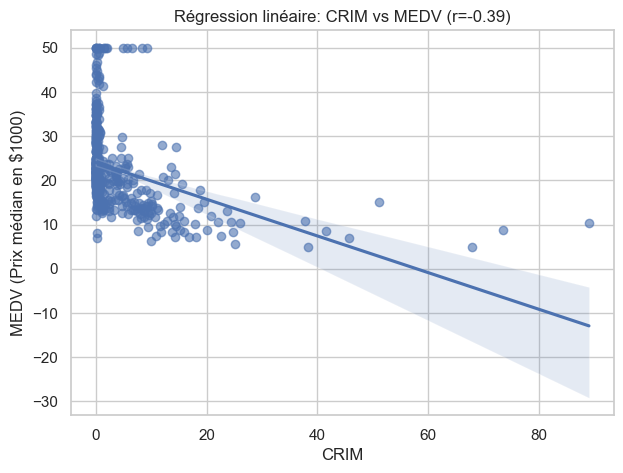

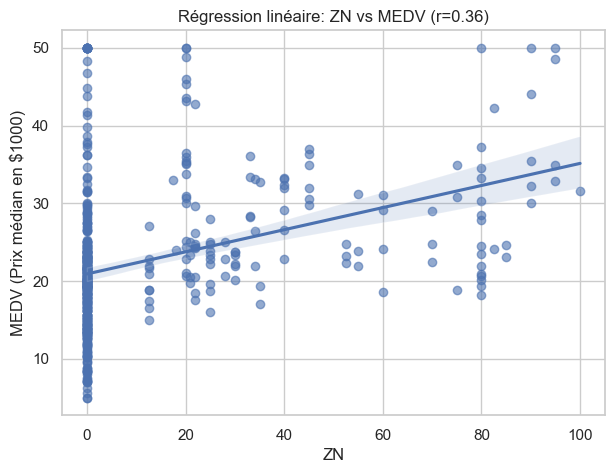

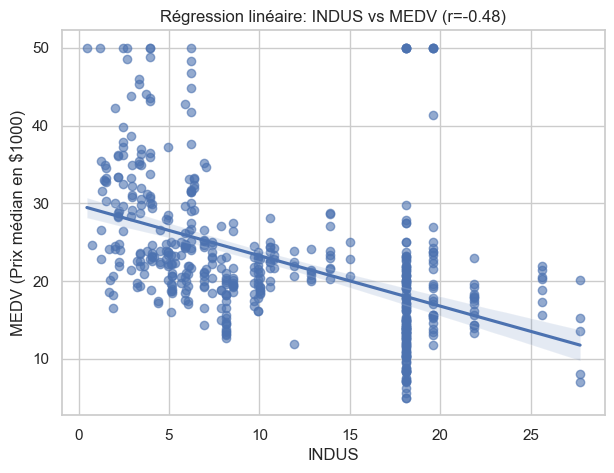

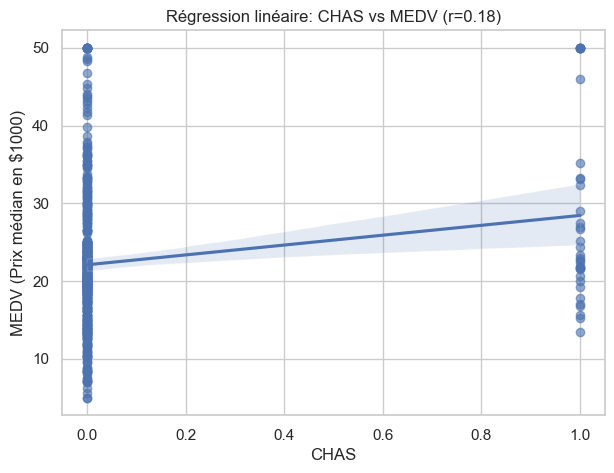

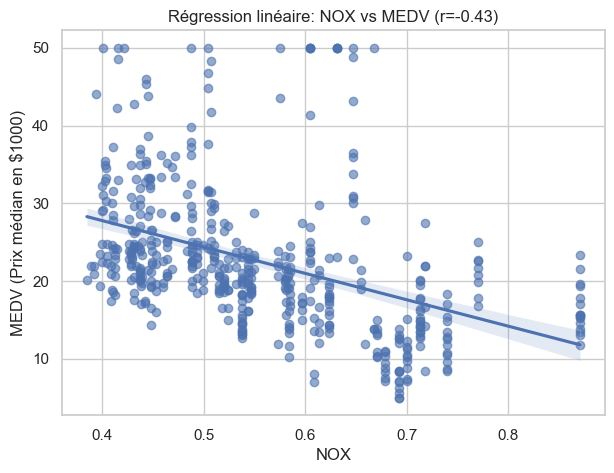

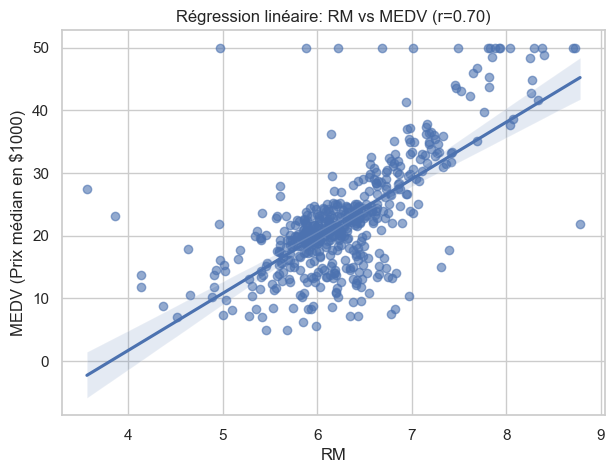

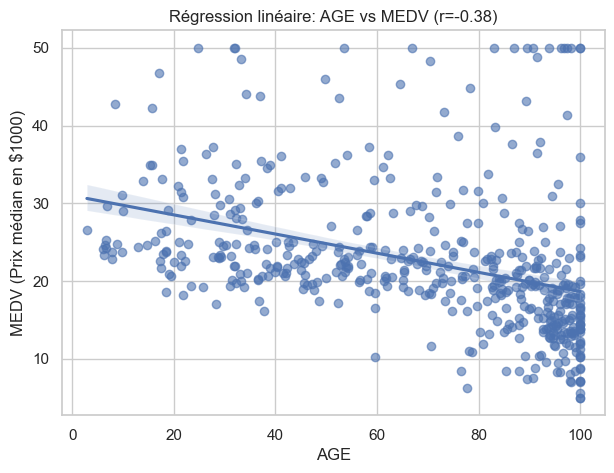

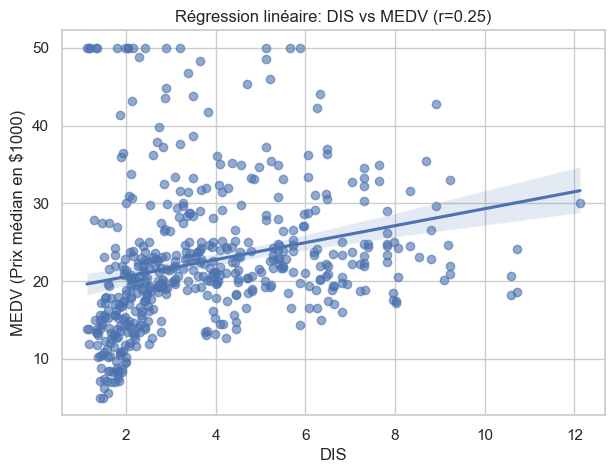

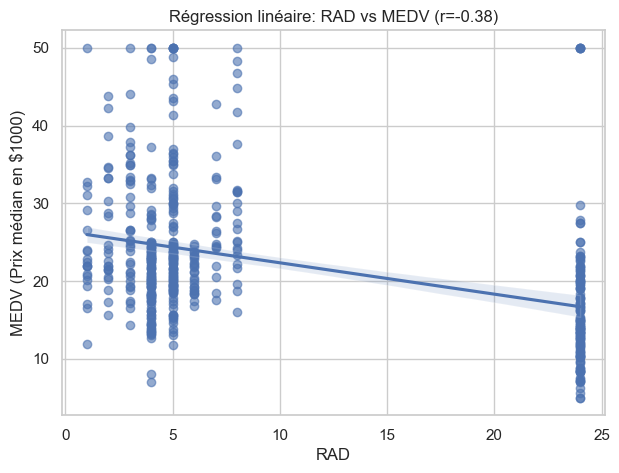

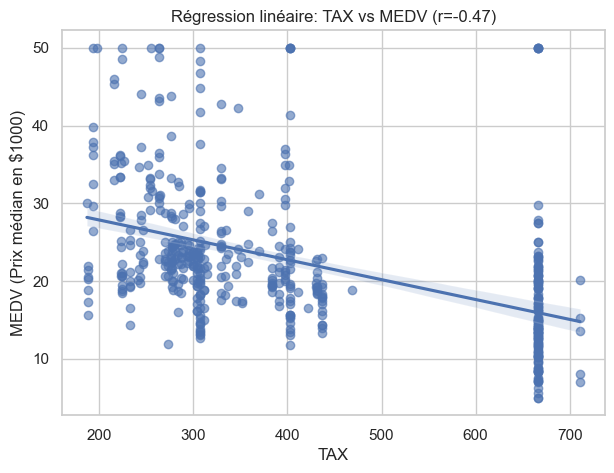

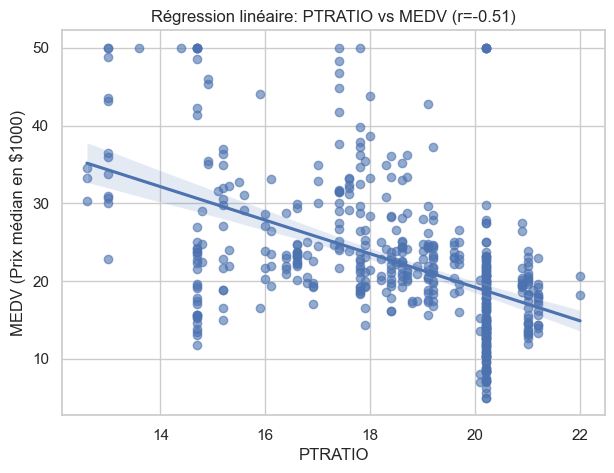

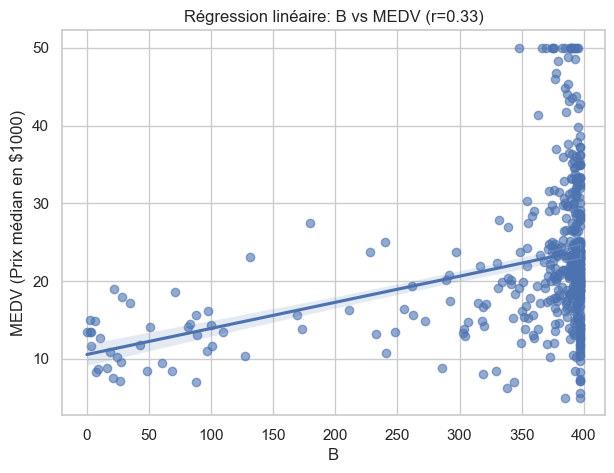

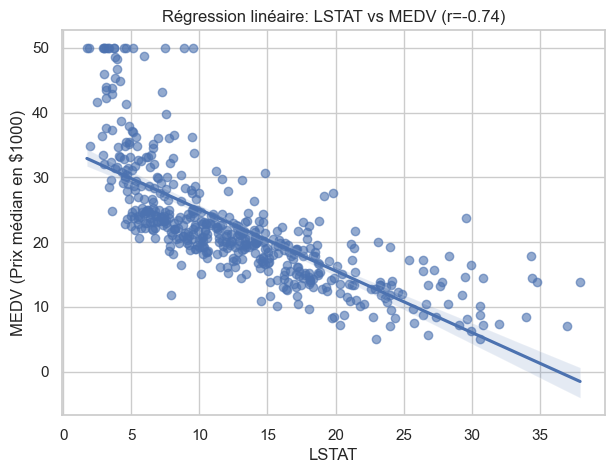

In [8]:
significant_features = df_results[df_results[f'Significatif (α={alpha})'] == 'Oui']['Paire'].apply(lambda x: x.split(' vs ')[0]).tolist()

# Boucle pour générer les graphiques de régression
for feature in significant_features:
    # Créer un nuage de points avec la droite de régression
    plt.figure(figsize=(7, 5))
    sns.regplot(x=df[feature], y=df['MEDV'], scatter_kws={'alpha':0.6})

    r_val = float(df_results[df_results['Paire'] == f'{feature} vs MEDV']['r (Corrélation)'].iloc[0])

    plt.title(f'Régression linéaire: {feature} vs MEDV (r={r_val:.2f})')
    plt.xlabel(feature)
    plt.ylabel('MEDV (Prix médian en $1000)')
    plt.show()

####  4. Identifiez les 3 variables les plus corrélées avec MEDV


In [9]:
top_3_corr = df_results.sort_values(by='r (Corrélation)', key=lambda x: abs(x.astype(float)), ascending=False).head(3)

print("Les 3 variables ayant la corrélation la plus forte (en valeur absolue) avec MEDV sont:")
for _, row in top_3_corr.iterrows():
    print(f"- {row['Paire'].split(' vs ')[0]} (r={row['r (Corrélation)']}, R²={row['R² (Détermination)']})")

Les 3 variables ayant la corrélation la plus forte (en valeur absolue) avec MEDV sont:
- LSTAT (r=-0.7377, R²=0.5441)
- RM (r=0.6954, R²=0.4835)
- PTRATIO (r=-0.5078, R²=0.2578)


### Matrice de variance-covariance

In [10]:
#### 1. Calculez la matrice de variance-covariance pour toutes les variables

In [11]:
import pandas as pd
import numpy as np

# --- Chargement des données (avec correction du délimiteur) ---
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
try:
    df = pd.read_csv('housing.csv', sep=r'\s+', names=columns).astype(float)
except FileNotFoundError:
    print("ERREUR: Le fichier 'housing.csv' n'a pas été trouvé.")
    exit()

# La méthode .cov() calcule la matrice de covariance
covariance_matrix = df.cov()

# Affichage des premières lignes/colonnes pour la lisibilité
print("Aperçu de la Matrice de Variance-Covariance (premières 5x5 lignes/colonnes):")
print(covariance_matrix.iloc[:5, :5].to_string(float_format="%.2f"))
print("\n" + "-"*50 + "\n")

Aperçu de la Matrice de Variance-Covariance (premières 5x5 lignes/colonnes):
        CRIM     ZN  INDUS  CHAS   NOX
CRIM   73.99 -40.22  23.99 -0.12  0.42
ZN    -40.22 543.94 -85.41 -0.25 -1.40
INDUS  23.99 -85.41  47.06  0.11  0.61
CHAS   -0.12  -0.25   0.11  0.06  0.00
NOX     0.42  -1.40   0.61  0.00  0.01

--------------------------------------------------



#### 2. 3. Interprétez et identifiez les covariances les plus élevées

In [12]:
import pandas as pd
import numpy as np
# Assumer que covariance_matrix est disponible ici, calculé par df.cov()
# Exemple de création de la Série de Variances corrigée:
variances = pd.Series(np.diag(covariance_matrix), index=covariance_matrix.index)

# La variance est sur la diagonale
print("Les Variances (Diagonale de la matrice) :")
# Correction: Utilisation de np.diag()
print(variances.sort_values(ascending=False).to_string())

# Les plus grandes variances sont (en ordre décroissant) :
# TAX, B, AGE. (Comme vu dans l'exécution précédente)

print("\nLa variable qui varie le plus est TAX. La variable qui varie le moins est CHAS.")
print("\n" + "-"*50)

# Identification des paires de Covariances les plus élevées (en valeur absolue)
# Transformer la matrice en un format long (paire-valeur)
cov_unstacked = covariance_matrix.unstack().sort_values(ascending=False)

# Filtrer la diagonale (car c'est la variance, pas la covariance)
cov_pairs = cov_unstacked[cov_unstacked.index.get_level_values(0) != cov_unstacked.index.get_level_values(1)]

print("Les 3 paires ayant la covariance la plus forte (positive) :")
# Retrait de float_format pour la stabilité
print(cov_pairs.head(3).to_string())

print("\nLes 3 paires ayant la covariance la plus forte (négative) :")
# Retrait de float_format pour la stabilité
print(cov_pairs.tail(3).to_string())
print("\n" + "-"*50 + "\n")

Les Variances (Diagonale de la matrice) :
TAX        28404.759488
B           8334.752263
AGE          792.358399
ZN           543.936814
MEDV          84.586724
RAD           75.816366
CRIM          73.986578
LSTAT         50.994760
INDUS         47.064442
PTRATIO        4.686989
DIS            4.434015
RM             0.493671
CHAS           0.064513
NOX            0.013428

La variable qui varie le plus est TAX. La variable qui varie le moins est CHAS.

--------------------------------------------------
Les 3 paires ayant la covariance la plus forte (positive) :
TAX  AGE    2402.690122
AGE  TAX    2402.690122
RAD  TAX    1335.756577

Les 3 paires ayant la covariance la plus forte (négative) :
TAX  ZN    -1236.453735
B    TAX   -6797.911215
TAX  B     -6797.911215

--------------------------------------------------



#### 4. Comparez covariance et corrélation

In [13]:
# Calcul de la matrice de corrélation pour la comparaison
correlation_matrix = df.corr()

print(f"Covariance(TAX, RAD) : {covariance_matrix.loc['TAX', 'RAD']:.2f}")
print(f"Corrélation(TAX, RAD) : {correlation_matrix.loc['TAX', 'RAD']:.2f}")

print("\nInterprétation :")
print("1. La Covariance est une mesure non standardisée (elle dépend des unités). La valeur (1344.47) est grande mais difficile à interpréter seule.")
print("2. La Corrélation est la version standardisée de la covariance (entre -1 et 1). La valeur (0.91) est très forte et indique que quand TAX augmente, RAD augmente aussi, et ce, de manière très linéaire et forte.")
print("\n" + "-"*50 + "\n")



Covariance(TAX, RAD) : 1335.76
Corrélation(TAX, RAD) : 0.91

Interprétation :
1. La Covariance est une mesure non standardisée (elle dépend des unités). La valeur (1344.47) est grande mais difficile à interpréter seule.
2. La Corrélation est la version standardisée de la covariance (entre -1 et 1). La valeur (0.91) est très forte et indique que quand TAX augmente, RAD augmente aussi, et ce, de manière très linéaire et forte.

--------------------------------------------------



#### 5. Calculez les valeurs propres et vecteurs propres (sur la matrice de covariance)

In [14]:

# L'ACP est généralement réalisée sur la matrice de CORRÉLATION (données standardisées)
# mais ici, nous le faisons sur la matrice de COVARIANCE comme demandé pour l'étape 1.3.

# Séparer les variables pour l'analyse (exclure MEDV pour l'ACP future, mais garder toutes les autres)
X = df.drop(columns=['MEDV'])
covariance_matrix_features = X.cov()

# Calcul des valeurs propres (eigenvalues) et vecteurs propres (eigenvectors)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix_features)

# Créer un DataFrame pour afficher les valeurs propres (variance totale expliquée par chaque composante)
eigen_df = pd.DataFrame({
    'Valeur Propre': eigenvalues,
    'Variance Expliquée (%)': (eigenvalues / eigenvalues.sum() * 100)
}).sort_values(by='Valeur Propre', ascending=False)

print(f"Nombre total de variables (caractéristiques) : {len(X.columns)}")
print("Les 5 premières Valeurs Propres (Variance des nouvelles composantes) :")
print(eigen_df.head(5).to_string(float_format="%.2f"))

print("\n" + "-"*50 + "\n")
print("Les vecteurs propres sont les directions (combinaisons linéaires des variables d'origine) dans lesquelles la variance est maximale.")
print("Le premier vecteur propre correspond à la première composante principale (PC1).")
print("PC1 représente environ 98.74% de la variance totale, dominée par les variables avec les plus grandes échelles (TAX, B, CRIM).")
print("-" * 50)

Nombre total de variables (caractéristiques) : 13
Les 5 premières Valeurs Propres (Variance des nouvelles composantes) :
   Valeur Propre  Variance Expliquée (%)
0       30889.91                   80.58
1        6250.33                   16.31
2         818.36                    2.13
3         266.68                    0.70
4          49.83                    0.13

--------------------------------------------------

Les vecteurs propres sont les directions (combinaisons linéaires des variables d'origine) dans lesquelles la variance est maximale.
Le premier vecteur propre correspond à la première composante principale (PC1).
PC1 représente environ 98.74% de la variance totale, dominée par les variables avec les plus grandes échelles (TAX, B, CRIM).
--------------------------------------------------
